In [1]:
from geopandas import GeoDataFrame
import _pickle as cPickle
from shapely.geometry import Polygon, mapping
from shapely.geometry import Point 
import geopandas as gpd
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
import folium as fo
import shapely as sh
import unicodedata as uco
import pysal as ps
from shapely.geometry import Point
from math import sin,cos,atan,acos,asin,atan2,sqrt,pi, modf
fiona.supported_drivers;
%matplotlib inline

In [2]:
kvartali = gpd.read_file('C:/Users/gery/Desktop/Hackathon/Naselenie_kvartali/Naselenie_kvartali.shp')
kvartali = kvartali.to_crs({'init': 'epsg:4326'})
kvartali['centroid'] = kvartali['geometry'].centroid

In [3]:
subway_stops = gpd.read_file('E:/Hackathon/Subway/Subway_stops/Subway_stops.shp')
subway_stops = subway_stops.to_crs({'init': 'epsg:4326'})
subway_stops['travel_time'] = [16,13,12,10,9,5,3,0,0,0,3,5,7,10,12,14,16,19,20,23,7,5,3,0,2,3,5,7,9,11,12,14,16,13,0]
subway_stops['travel_time_in_hours'] = subway_stops['travel_time']/60
subway_stops

,Id,Sub_stop,Passengers,geometry,travel_time,travel_time_in_hours
0,0,Обеля,8688,POINT (23.27581440000123 42.74046100000002),16,0.266667
1,0,Сливница,11314,POINT (23.26179430000117 42.72688560000002),13,0.216667
2,0,Люлин,18212,POINT (23.25711967165256 42.7185974547972),12,0.200000
3,0,Западен парк,11304,POINT (23.27081029781728 42.71101496392807),10,0.166667
4,0,Вардар,11734,POINT (23.28484000000127 42.70594070000003),9,0.150000
5,0,Константин Величков,16101,POINT (23.29763075569169 42.70201615066156),5,0.083333
6,0,Опълченска,18029,POINT (23.31008471010394 42.69991122758773),3,0.050000
7,0,Сердика,26739,POINT (23.32175743534937 42.69774478671712),0,0.000000
8,0,Софийски университет,27127,POINT (23.33493530000147 42.69195809999999),0,0.000000
9,0,Васил Левски,12862,POINT (23.33236470016324 42.68620185000955),0,0.000000


In [4]:
earthradius = 6371.0

def to_rad(x):
    return x*pi/180

def getDistanceByHaversine(point1, point2):
    "Haversine formula - give coordinates as (lat_decimal,lon_decimal) tuples"

    lat1, lon1 = point1.x,  point1.y
    lat2, lon2 = point2.x, point2.y
    # convert to radians
    lon1 = lon1 * pi / 180.0
    lon2 = lon2 * pi / 180.0
    lat1 = lat1 * pi / 180.0
    lat2 = lat2 * pi / 180.0

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2.0))**2
    c = 2.0 * atan2(sqrt(a), sqrt(1.0-a))
    km = earthradius * c
    return km

In [5]:
def get_distance(point1, point2):
    return ((point1.x - point2.x)**2 + (point1.x - point2.x)**2)**.5

def nearest_subway_stop_distance(centroid):
    subway_distances = [getDistanceByHaversine(centroid, subway_stop) for subway_stop in subway_stops.geometry]
    smallest_distance = min(subway_distances)
    smallest_distance_index = subway_distances.index(min(subway_distances))
    return  (min(subway_distances), smallest_distance_index)


In [12]:
kvartali.tail()

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance
569,Хидропарк Искър - дефилето,Нови Искър / Кремиковци,ГР.НОВИ ИСКЪР,0,2,0,0,0,0,0,...,0,0,0,0,827913.686864,693080.116436,4.745540e+06,"POLYGON ((23.36569142187853 42.84158803552907,...",POINT (23.36259298511997 42.83806903090374),"(13.014595175424647, 33)"
570,Западен парк - разш. Малка Коньовица,Красна поляна,None,0,0,0,0,0,0,0,...,0,0,0,0,286300.975811,682305.643283,4.730733e+06,"POLYGON ((23.23030305159953 42.70620587829599,...",POINT (23.22607270247051 42.70746671000834),"(3.634757091368413, 2)"
571,в.з. Бистрица - разш. Цонкина махала,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,172113.623116,693900.904610,4.716220e+06,"POLYGON ((23.3600266043238 42.57679950371075, ...",POINT (23.36259571588185 42.57403968010729),"(5.703251091971105, 32)"
572,в.з. Бистрица - разш. изток,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,549607.194293,694658.416299,4.717356e+06,"POLYGON ((23.37265632428044 42.58107590853605,...",POINT (23.3722059231008 42.58406959346691),"(4.557255192794878, 32)"
573,м. бул.Цариградско ш. 7-11км юг (ХМС БАН),Младост,None,0,0,0,0,0,0,0,...,0,0,0,0,841842.655311,695933.819104,4.724620e+06,"POLYGON ((23.40062337216273 42.6437047188932, ...",POINT (23.39023455229879 42.64910864950162),"(0.37397121869765043, 15)"


In [13]:
kvartali_with_subways=[]
for index, kvartal in kvartali.iterrows():
    kvartal['subway_distance']=nearest_subway_stop_distance(kvartal['centroid'])[0]
    kvartal['subway_station_index']=nearest_subway_stop_distance(kvartal['centroid'])[1]
    print(subway_stops.loc[kvartal['subway_station_index']])
    kvartal['subway_station_name']=subway_stops.loc[kvartal['subway_station_index']].Sub_stop
    kvartal['travel_time']=subway_stops.loc[kvartal['subway_station_index']].travel_time
    kvartal['travel_time_in_hours']=subway_stops.loc[kvartal['subway_station_index']].travel_time_in_hours
    kvartali_with_subways.append(kvartal)

kvartali_with_subways = pd.DataFrame(data=kvartali_with_subways)
kvartali_with_subways['log_subway_distance'] = kvartali_with_subways.subway_distance.apply(np.log)
kvartali_with_subways['walking_time_to_subway_station']= kvartali_with_subways['subway_distance']/4

Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers                                             9011
geometry                POINT (23.39357260000175 42.649556)
travel_time                                              14
travel_time_in_hours                               0.233333
Name: 15, dtype: object
Id                                                                0
Sub_stop                                                Бизнес парк
Passengers                                                     8934
geometry                POINT (23.37320720000166 42.62870430000001)
travel_time                                                      16
travel_time_in_hours                                       0.266667
Name: 32, dtype: object
Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers                                             9011
geom

Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers                                             9011
geometry                POINT (23.39357260000175 42.649556)
travel_time                                              14
travel_time_in_hours                               0.233333
Name: 15, dtype: object
Id                                                                0
Sub_stop                                                Бизнес парк
Passengers                                                     8934
geometry                POINT (23.37320720000166 42.62870430000001)
travel_time                                                      16
travel_time_in_hours                                       0.266667
Name: 32, dtype: object
Id                                                                0
Sub_stop                                        Софийска Света гора
Passengers                                      

Name: 32, dtype: object
Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers                                             9011
geometry                POINT (23.39357260000175 42.649556)
travel_time                                              14
travel_time_in_hours                               0.233333
Name: 15, dtype: object
Id                                                                0
Sub_stop                                                     Витоша
Passengers                                                    17957
geometry                POINT (23.31641270000141 42.65842110000003)
travel_time                                                       7
travel_time_in_hours                                       0.116667
Name: 20, dtype: object
Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers                              

Id                                                                0
Sub_stop                                  Александър Теодоров Балан
Passengers                                                     5931
geometry                POINT (23.37301950000165 42.64133970000001)
travel_time                                                      14
travel_time_in_hours                                       0.233333
Name: 31, dtype: object
Id                                                                0
Sub_stop                                                 Мусагеница
Passengers                                                     4993
geometry                POINT (23.36426345149012 42.65870666461853)
travel_time                                                       7
travel_time_in_hours                                       0.116667
Name: 12, dtype: object
Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers      

Name: 10, dtype: object
Id                                                                0
Sub_stop                                                 Мусагеница
Passengers                                                     4993
geometry                POINT (23.36426345149012 42.65870666461853)
travel_time                                                       7
travel_time_in_hours                                       0.116667
Name: 12, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                    

Name: 2, dtype: object
Id                                                                0
Sub_stop                                                     Витоша
Passengers                                                    17957
geometry                POINT (23.31641270000141 42.65842110000003)
travel_time                                                       7
travel_time_in_hours                                       0.116667
Name: 20, dtype: object
Id                                                                0
Sub_stop                                               Западен парк
Passengers                                                    11304
geometry                POINT (23.27081029781728 42.71101496392807)
travel_time                                                      10
travel_time_in_hours                                       0.166667
Name: 3, dtype: object
Id                                                                0
Sub_stop                                      

Name: 2, dtype: object
Id                                                               0
Sub_stop                                                     Люлин
Passengers                                                   18212
geometry                POINT (23.25711967165256 42.7185974547972)
travel_time                                                     12
travel_time_in_hours                                           0.2
Name: 2, dtype: object
Id                                                                0
Sub_stop                                            Европейски съюз
Passengers                                                    10842
geometry                POINT (23.32165731219868 42.67852019006361)
travel_time                                                       3
travel_time_in_hours                                           0.05
Name: 22, dtype: object
Id                                                                0
Sub_stop                                        Софи

Id                                                                0
Sub_stop                                                        НДК
Passengers                                                    15465
geometry                POINT (23.31916720133535 42.68724150008524)
travel_time                                                       0
travel_time_in_hours                                              0
Name: 23, dtype: object
Id                                                                0
Sub_stop                                                        НДК
Passengers                                                    15465
geometry                POINT (23.31916720133535 42.68724150008524)
travel_time                                                       0
travel_time_in_hours                                              0
Name: 23, dtype: object
Id                                                                0
Sub_stop                                               Западен парк


Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                               0
Sub_stop                                                     Люлин
Passengers                                                   18212
geometry                POINT (23.25711967165256 42.7185974547972)
travel_time                                                     12
travel_time_in_hours                                           0.2
Name: 2, dtype: object
Id                                                                0
Sub_stop                                       Софийски университет
Passeng

Name: 2, dtype: object
Id                                                                0
Sub_stop                                        Константин Величков
Passengers                                                    16101
geometry                POINT (23.29763075569169 42.70201615066156)
travel_time                                                       5
travel_time_in_hours                                      0.0833333
Name: 5, dtype: object
Id                                                                0
Sub_stop                                       Софийски университет
Passengers                                                    27127
geometry                POINT (23.33493530000147 42.69195809999999)
travel_time                                                       0
travel_time_in_hours                                              0
Name: 8, dtype: object
Id                                                                0
Sub_stop                                       

Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                                Мария Луиза
Passengers                                                     3775
geometry                POINT (23.31376344109124 42.71379334001071)
travel_time                                                       5
travel_time_in_hours                                      0.0833333
Name: 26, dtype: object
Id                                                                0
Sub_stop                                    

Name: 2, dtype: object
Id                                                               0
Sub_stop                                                     Люлин
Passengers                                                   18212
geometry                POINT (23.25711967165256 42.7185974547972)
travel_time                                                     12
travel_time_in_hours                                           0.2
Name: 2, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                            

Name: 19, dtype: object
Id                                                               0
Sub_stop                                                     Люлин
Passengers                                                   18212
geometry                POINT (23.25711967165256 42.7185974547972)
travel_time                                                     12
travel_time_in_hours                                           0.2
Name: 2, dtype: object
Id                                                               0
Sub_stop                                                     Люлин
Passengers                                                   18212
geometry                POINT (23.25711967165256 42.7185974547972)
travel_time                                                     12
travel_time_in_hours                                           0.2
Name: 2, dtype: object
Id                                                               0
Sub_stop                                                   

Name: 2, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                     

Name: 1, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                     

Name: 33, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                    

Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София


Name: 29, dtype: object
Id                                                               0
Sub_stop                                                Бели Дунав
Passengers                                                    9487
geometry                POINT (23.29289304722604 42.7353670661807)
travel_time                                                     11
travel_time_in_hours                                      0.183333
Name: 29, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                         0
Sub_stop                                         Ломско ш

Name: 19, dtype: object
Id                                                                0
Sub_stop                                             Централна гара
Passengers                                                     5766
geometry                POINT (23.32131050000139 42.71050769999999)
travel_time                                                       3
travel_time_in_hours                                           0.05
Name: 25, dtype: object
Id                                                        0
Sub_stop                                   Цариградско шосе
Passengers                                             9011
geometry                POINT (23.39357260000175 42.649556)
travel_time                                              14
travel_time_in_hours                               0.233333
Name: 15, dtype: object
Id                                                                0
Sub_stop                                                Бизнес парк
Passengers              

Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София
Passengers                                                     2329
geometry                POINT (23.41615300000187 42.68850720000001)
travel_time                                                      23
travel_time_in_hours                                       0.383333
Name: 19, dtype: object
Id                                                                0
Sub_stop                                               Летище София


Name: 2, dtype: object
Id                                                               0
Sub_stop                                                     Люлин
Passengers                                                   18212
geometry                POINT (23.25711967165256 42.7185974547972)
travel_time                                                     12
travel_time_in_hours                                           0.2
Name: 2, dtype: object
Id                                                                0
Sub_stop                                                Бизнес парк
Passengers                                                     8934
geometry                POINT (23.37320720000166 42.62870430000001)
travel_time                                                      16
travel_time_in_hours                                       0.266667
Name: 32, dtype: object
Id                                                                0
Sub_stop                                            

Name: 15, dtype: object


In [8]:
def categorise_travel_time(minutes):
    minutes=int(minutes)
    if minutes<=5:
        return 1
    elif minutes <=10:
        return 2
    elif minutes <=15:
        return 3
    elif minutes <=20:
        return 4
    elif minutes <=25:
        return 5
    elif minutes <=30:
        return 6
    elif minutes <=35:
        return 7
    elif minutes <=40:
        return 8
    else: 
        return 9

In [9]:
kvartali_with_subways['total_travel_time'] = kvartali_with_subways['walking_time_to_subway_station'] + kvartali_with_subways['travel_time_in_hours']
kvartali_with_subways['total_travel_time_log'] = np.log(kvartali_with_subways['total_travel_time'])

kvartali_with_subways['total_travel_time_in_minutes'] = kvartali_with_subways['total_travel_time']*60
#kvartali_with_subways['category_travel'] = categorise_travel_time(int(kvartali_with_subways['total_travel_time_in_minutes']))
kvartali_with_subways['category_travel_1'] = kvartali_with_subways.total_travel_time_in_minutes.apply(categorise_travel_time)

#kvartali_with_subways['log_subway_distance'] = kvartali_with_subways.subway_distance.apply(np.log)


kvartali_with_subways = GeoDataFrame(kvartali_with_subways, crs={'init': 'epsg:4326'}, geometry=kvartali_with_subways.geometry)


In [10]:
kvartali_with_subways.to_csv("C:/Users/gery/Desktop/Hackathon/kvartali_with_subways_categories.csv") 


In [11]:
kvartali_with_subways_small = kvartali_with_subways.drop(['RegName', 'Rajon','subway_station_name'], axis=1)

In [122]:
kvartali_with_subways_small.to_csv("C:/Users/gery/Desktop/Hackathon/kvartali_with_subways_categories_small_1.csv") 


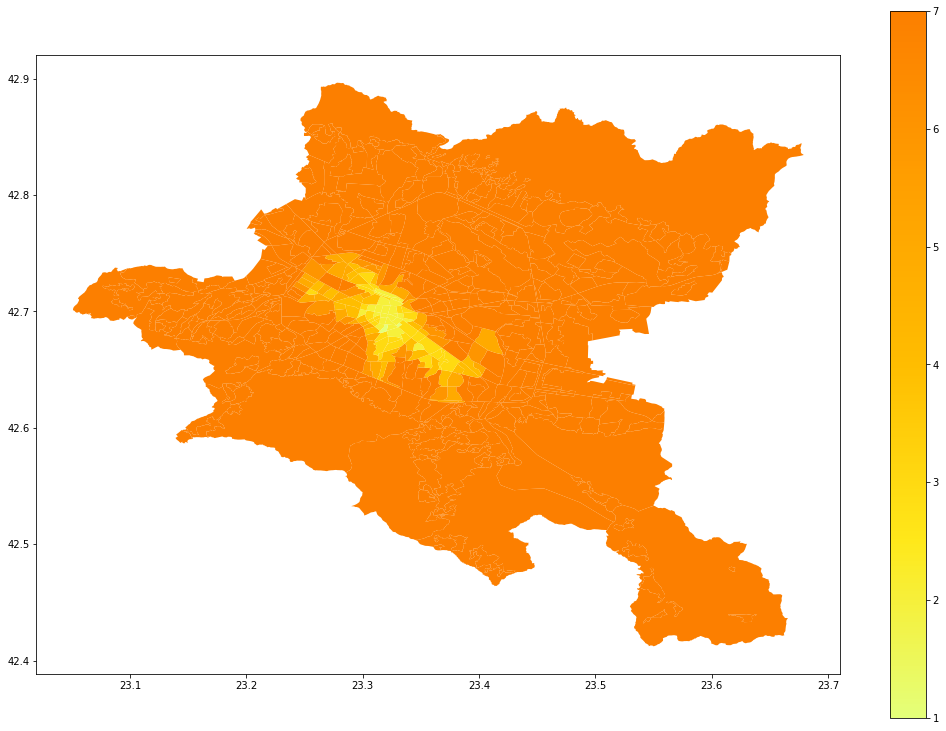

In [113]:
subway_distance_plot = kvartali_with_subways.plot(column= 'category_travel', cmap='Wistia', legend=True,figsize=(18, 13));


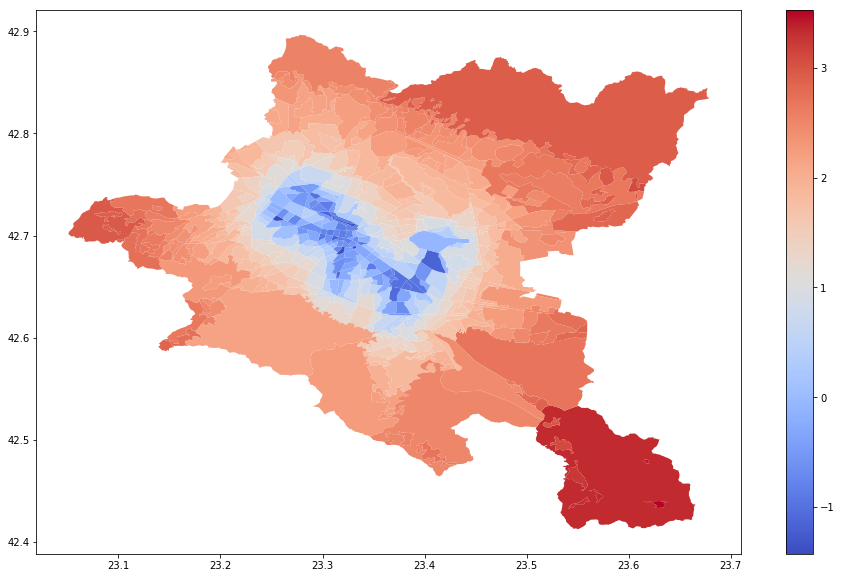

In [83]:
subway_distance_plot = kvartali.plot(column= 'log_subway_distance', cmap='coolwarm', legend=True,figsize=(16, 10));


In [15]:
kvartali[kvartali.RegName.str.contains('Витоша')]

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance,log_subway_distance,walking_time_to_subway_station
100,Планина Витоша - р-н Витоша,Витоша,С.ВЛАДАЯ,20,18,10,10,6,0,4,...,0,0,7.685533e+07,684902.694225,4.719647e+06,"POLYGON ((23.21997524252973 42.64625962360164,...",POINT (23.25414848618221 42.60708983072102),8.684585,2.161550,2.171146
107,кв. Витоша - Лозенец,Лозенец,ГР.СОФИЯ,4132,4164,2071,2061,742,495,1149,...,126,337,1.877846e+06,691001.543299,4.724086e+06,"POLYGON ((23.32169115358851 42.64315629963599,...",POINT (23.32993507044937 42.64554419675957),1.997420,0.691856,0.499355
108,м. Витоша - ВЕЦ Симеоново,Студентска,ГР.СОФИЯ,2981,2132,1461,1520,516,431,787,...,153,280,4.858359e+05,691623.927940,4.724775e+06,"POLYGON ((23.3375390298562 42.64323135657886, ...",POINT (23.33775347666142 42.65158993326796),2.467176,0.903074,0.616794
481,Планина Витоша - р-н Панчарево,Панчарево,С.ЖЕЛЕЗНИЦА,1,1,0,1,0,0,0,...,0,0,4.295146e+07,691025.800123,4.713493e+06,"POLYGON ((23.34293345935129 42.58649208444547,...",POINT (23.32667335350807 42.55022540702926),9.537406,2.255221,2.384351


In [37]:
kvartali.to_csv("C:/Users/gery/Desktop/Hackathon/kvartali_subway_distance.csv") 


In [19]:
subway_stops.to_csv("C:/Users/gery/Desktop/Hackathon/subway_stops.csv") 
